### 1. Load the Document

In [3]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("https://vidyaprabodhinicollege.edu.in/VPCCECM/ebooks/ENGLISH%20LITERATURE/Harry%20potter/(Book%207)%20Harry%20Potter%20And%20The%20Deathly%20Hallows.pdf")
documents = loader.load()

# Validate
print(f"Number of pages loaded: {len(documents)}")
print(f"First page content preview:\n {documents[0].page_content[:500]}")
print(f"Metadata: {documents[0].metadata}")

Number of pages loaded: 768
First page content preview:
 
Metadata: {'producer': 'pdfeTeX-1.21a', 'creator': 'Dark Miasma', 'creationdate': '2007-07-23T04:17:48-07:00', 'author': 'J. K. Rowling', 'title': 'Harry Potter and the Deathly Hallows', 'subject': '', 'keywords': '', 'ptex.fullbanner': 'This is pdfeTeX, Version 3.141592-1.21a-2.2 (Web2C 7.5.4) kpathsea version 3.5.4', 'source': 'https://vidyaprabodhinicollege.edu.in/VPCCECM/ebooks/ENGLISH%20LITERATURE/Harry%20potter/(Book%207)%20Harry%20Potter%20And%20The%20Deathly%20Hallows.pdf', 'total_pages': 768, 'page': 0, 'page_label': 'i'}


### 2. Inspect the Raw Text

In [7]:
page = documents[8]
print(f"Page content length: {len(page.page_content)} characters")
print(f"Content : \n{page.page_content[:500]}")

Page content length: 846 characters
Content : 
Chapter 1
The Dark Lord
Ascending
T
he two men appeared out of nowhere, a few yards apart
in the narrow, moonlit lane. For a second they stood
quite still, wands directed at each other’s chests; then,
recognizing each other, they stowed their wands be-
neath their cloaks and started walking briskly in the same direc-
tion.
“News?” asked the taller of the two.
“The best,” replied Severus Snape.
The lane was bordered on the left by wild, low-growing bram-
bles, on the right by a high, nearty manic


### 3. Chunk the Document

In [9]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=50
)

chunks = splitter.split_documents(documents)

# Validate
print(f"Number of Chunks\t\t: {len(chunks)}")
print(f"\nFirst Chunk\t\t: {chunks[0].page_content[:500] }")
print(f"\nChunk Metadata\t\t: {chunks[0].metadata}")
print(f"\nChunk Sizes\t\t : {[len(chunk.page_content) for chunk in chunks[:10]]}")

Number of Chunks		: 2869

First Chunk		: Harry Potter and the
Deathly Hallows
by J. K. Rowling
brought to you by Dark Miasma
Special Thanks to the DSB release

Chunk Metadata		: {'producer': 'pdfeTeX-1.21a', 'creator': 'Dark Miasma', 'creationdate': '2007-07-23T04:17:48-07:00', 'author': 'J. K. Rowling', 'title': 'Harry Potter and the Deathly Hallows', 'subject': '', 'keywords': '', 'ptex.fullbanner': 'This is pdfeTeX, Version 3.141592-1.21a-2.2 (Web2C 7.5.4) kpathsea version 3.5.4', 'source': 'https://vidyaprabodhinicollege.edu.in/VPCCECM/ebooks/ENGLISH%20LITERATURE/Harry%20potter/(Book%207)%20Harry%20Potter%20And%20The%20Deathly%20Hallows.pdf', 'total_pages': 768, 'page': 2, 'page_label': 'i'}

Chunk Sizes		 : [117, 168, 255, 469, 295, 476, 489, 457, 388, 466]


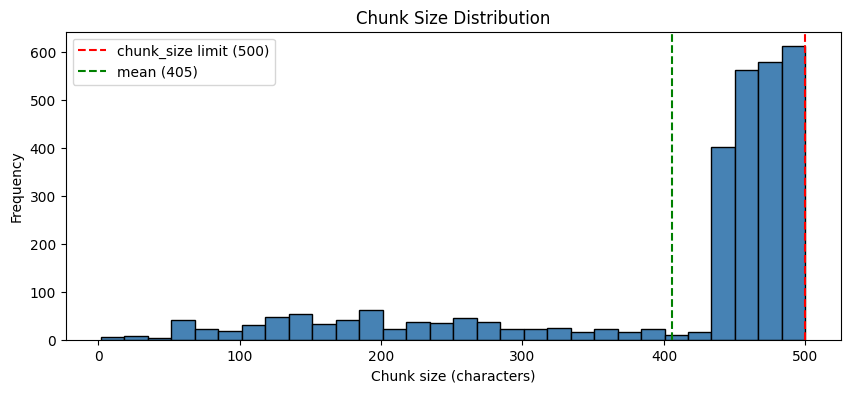

In [12]:
import matplotlib.pyplot as plt

chunk_sizes = [len(chunk.page_content) for chunk in chunks]

plt.figure(figsize=(10, 4))
plt.hist(chunk_sizes, bins=30, color="steelblue", edgecolor="black")
plt.axvline(500, color="red", linestyle="--", label="chunk_size limit (500)")
plt.axvline(sum(chunk_sizes)/len(chunk_sizes), color="green", linestyle="--", label=f"mean ({sum(chunk_sizes)//len(chunk_sizes)})")
plt.xlabel("Chunk size (characters)")
plt.ylabel("Frequency")
plt.title("Chunk Size Distribution")
plt.legend()
plt.show()

**Why chunks vary in size:**

**1. Natural boundaries are respected** — the splitter tries to break on \n\n, \n, ., " " before hitting the 500 limit, so a paragraph ending at 320 characters won't be padded to 500.

**2. Short pages/sections** — a page with only a heading or 2 lines will produce a small chunk.

**3. Overlap adds extra characters** — some chunks will be slightly larger due to the chunk_overlap.

**4. PDF extraction artifacts/** — PDFs often have inconsistent whitespace, headers, footers, and page numbers that affect how text is split.



### 4. Experiment with Chunk Size

In [14]:
# Try a larger chunk size
splitter_larger = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=100
)
chunks_larger = splitter_larger.split_documents(documents)

# Try a smaller chunk size
splitter_smaller = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=20
)
chunks_smaller = splitter_smaller.split_documents(documents)

# ✅ Validate
print(f"Small chunks (200):  {len(chunks_smaller)}")
print(f"Large chunks (1000): {len(chunks_larger)}")

Small chunks (200):  6867
Large chunks (1000): 1483


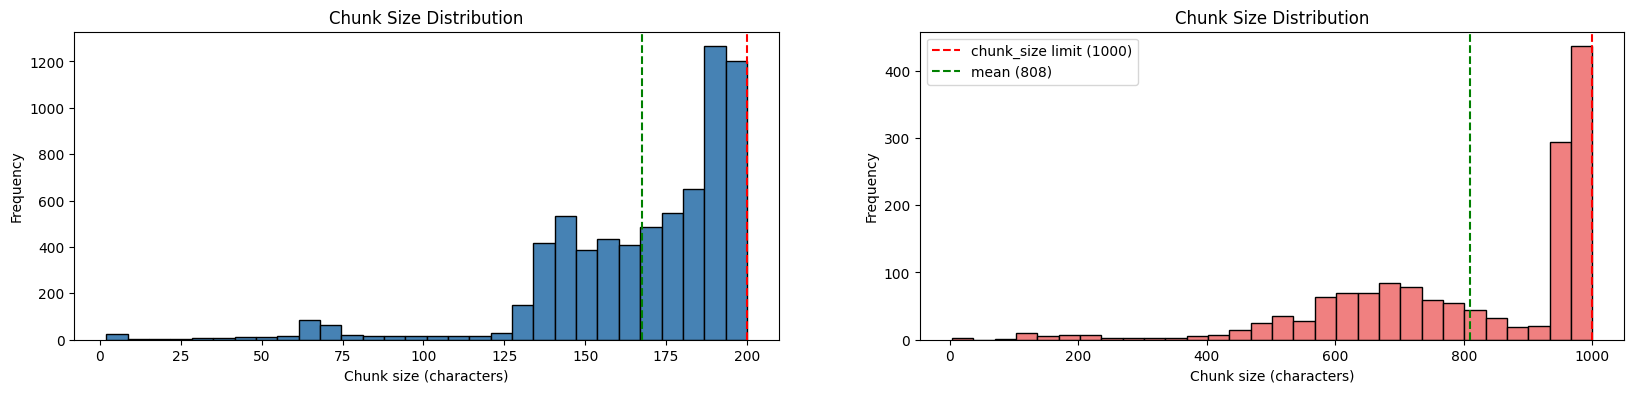

In [18]:


smaller_chunk_sizes = [len(chunk.page_content) for chunk in chunks_smaller]
larger_chunk_sizes = [len(chunk.page_content) for chunk in chunks_larger]

plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.hist(smaller_chunk_sizes, bins=30, color="steelblue", edgecolor="black")
plt.axvline(200, color="red", linestyle="--", label="chunk_size limit (200)")
plt.axvline(sum(smaller_chunk_sizes)/len(smaller_chunk_sizes), color="green", linestyle="--", label=f"mean ({sum(smaller_chunk_sizes)//len(smaller_chunk_sizes)})")
plt.xlabel("Chunk size (characters)")
plt.ylabel("Frequency")
plt.title("Chunk Size Distribution")

plt.subplot(1, 2, 2)
plt.hist(larger_chunk_sizes, bins=30, color="lightcoral", edgecolor="black")
plt.axvline(1000, color="red", linestyle="--", label="chunk_size limit (1000)")
plt.axvline(sum(larger_chunk_sizes)/len(larger_chunk_sizes), color="green", linestyle="--", label=f"mean ({sum(larger_chunk_sizes)//len(larger_chunk_sizes)})")
plt.xlabel("Chunk size (characters)")
plt.ylabel("Frequency")
plt.title("Chunk Size Distribution")
plt.legend()
plt.show()

### 5. Create Embeddings

In [23]:
import os
from dotenv import load_dotenv
load_dotenv()

openai_api_key = os.getenv("OPENAI_API_KEY")

In [24]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small", api_key=openai_api_key)

# Test on a single chunk before ebedding all
test_vector = embeddings.embed_query(chunks[0].page_content)

# Validate
print(f" Vector dimension: {len(test_vector)}")
print(f" First 5 values: {test_vector[:5]}")

 Vector dimension: 1536
 First 5 values: [0.0077145835384726524, 0.04257283732295036, -0.019295966252684593, -0.005416689906269312, 0.002074443269520998]


### 6. Store in a Vector Store

In [28]:
from langchain_community.vectorstores import FAISS

vectorstore = FAISS.from_documents(chunks, embeddings)

# Validate
print(f"Vector store created successfully with {vectorstore.index.ntotal} vectors.")

Vector store created successfully with 2869 vectors.


### 7. Query the Vector Store

In [36]:
query = "When did Ron mutter Descendo?"
# query = "Descendo" 
results = vectorstore.similarity_search(query, k=3, fetch_k=20, lambda_mult=1)

# Fetch k
# lambda_mult

# ✅ Validate
print(f"Top {len(results)} results for: '{query}'\n")
for i, doc in enumerate(results):
    print(f"--- Result {i+1} ---")
    print(f"Source: {doc.metadata}")
    print(f"Content: {doc.page_content[:200]}")
    print()

Top 3 results for: 'When did Ron mutter Descendo?'

--- Result 1 ---
Source: {'producer': 'pdfeTeX-1.21a', 'creator': 'Dark Miasma', 'creationdate': '2007-07-23T04:17:48-07:00', 'author': 'J. K. Rowling', 'title': 'Harry Potter and the Deathly Hallows', 'subject': '', 'keywords': '', 'ptex.fullbanner': 'This is pdfeTeX, Version 3.141592-1.21a-2.2 (Web2C 7.5.4) kpathsea version 3.5.4', 'source': 'https://vidyaprabodhinicollege.edu.in/VPCCECM/ebooks/ENGLISH%20LITERATURE/Harry%20potter/(Book%207)%20Harry%20Potter%20And%20The%20Deathly%20Hallows.pdf', 'total_pages': 768, 'page': 147, 'page_label': '140'}
Content: opera or to declaim in Mermish — do not repress it! You may have
been gifted by the Gernumblies!”
Ron, passing them in the opposite direction, let out a loud snort.
“Ron can laugh,” said Luna serenely

--- Result 2 ---
Source: {'producer': 'pdfeTeX-1.21a', 'creator': 'Dark Miasma', 'creationdate': '2007-07-23T04:17:48-07:00', 'author': 'J. K. Rowling', 'title': 'Harry Potter and t

### 8. Store and Reload the Vector Store

In [37]:
# save to disk
vectorstore.save_local("my_vectorstore")

# reload
vectorstore_reloaded = FAISS.load_local(
    "my_vectorstore", 
    embeddings,
    allow_dangerous_deserialization=True
)

# ✅ Validate
results = vectorstore_reloaded.similarity_search("accessibility", k=2)
print(f"Reloaded store works: {len(results)} results found")

Reloaded store works: 2 results found
